# Learning From Data HW7

Imports

In [1]:
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Validation

Load all the data

In [2]:
data_test = np.loadtxt("out.dta")
X_test, y_test = data_test[:,:-1], data_test[:,-1]

data = np.loadtxt("in.dta")
X, y = data[:,:-1], data[:,-1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=25, shuffle=False)

print(X_train.shape)
print(X_val.shape)

(25, 2)
(10, 2)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Define nonlinear transformations

In [3]:
phis = [
    lambda X: np.ones((X.shape[0],1)),
    lambda X: X[:,0],
    lambda X: X[:,1],
    lambda X: X[:,0]**2,
    lambda X: X[:,1]**2,
    lambda X: X[:,0]*X[:,1],
    lambda X: np.abs(X[:,0] - X[:,1]),
    lambda X: np.abs(X[:,0] + X[:,1]),
]

k = 3
Zs = lambda k: lambda X: np.column_stack([phi(X) for phi in phis[:k+1]])

# 1

For which model is the classification error on the validation set smallest?

In [4]:
for k in range(8):
    reg1 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg1.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

k= 0 validation classification error: 0.4
k= 1 validation classification error: 0.5
k= 2 validation classification error: 0.7
k= 3 validation classification error: 0.3
k= 4 validation classification error: 0.5
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.0
k= 7 validation classification error: 0.1


The classification error is smallest for k=6. **Alternative 1D**

# 2

For which model is out-of-sample classification error smallest?

In [5]:
for k in range(8):
    reg2 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg2.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

k= 0 test classification error: 0.472
k= 1 test classification error: 0.488
k= 2 test classification error: 0.648
k= 3 test classification error: 0.42
k= 4 test classification error: 0.416
k= 5 test classification error: 0.188
k= 6 test classification error: 0.084
k= 7 test classification error: 0.072


The out-of-sample classification error is smallest for k=7. **Alternative 2E**

# 3

Reverse the role of the training and validation sets. For which model is the classification error on the validation set smallest?

In [6]:
# Swap validation and training data
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg3 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg3.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 validation classification error: 0.44
k= 1 validation classification error: 0.44
k= 2 validation classification error: 0.44
k= 3 validation classification error: 0.28
k= 4 validation classification error: 0.36
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.08
k= 7 validation classification error: 0.12


The error is smallest for k=6. **Alternative 3D**

# 4
Reverse the role of the training and validation sets. For which model is the classification error on the testing set smallest?

In [7]:
# Swap validation and training data
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg4 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg4.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 test classification error: 0.472
k= 1 test classification error: 0.472
k= 2 test classification error: 0.5
k= 3 test classification error: 0.396
k= 4 test classification error: 0.388
k= 5 test classification error: 0.284
k= 6 test classification error: 0.192
k= 7 test classification error: 0.196


The error is lowest for k=6, **Alternative 4D**

# 5
What out-of-sample classification error did the models in Problem 1 and 3 have, respectively?

In [8]:
# Training with thes testing set
k1 = 6
reg1 = LinearRegression(fit_intercept=False).fit(Zs(k1)(X_train), y_train)
y_test_pred = np.sign(reg1.predict(Zs(k1)(X_test)))
print("k1=", k1, "test classification error:", np.mean(y_test_pred != y_test))

# Training with the validation set
k3 = 6
reg3 = LinearRegression(fit_intercept=False).fit(Zs(k3)(X_val), y_val)
y_test_pred = np.sign(reg3.predict(Zs(k3)(X_test)))
print("k3=", k3, "test classification error:", np.mean(y_test_pred != y_test))

k1= 6 test classification error: 0.084
k3= 6 test classification error: 0.192


Which is closest to **Alternative 5B**

# 6

Two uniformly distributed variables on [0, 1]. What is the expected value of the minimum of those two random variables?

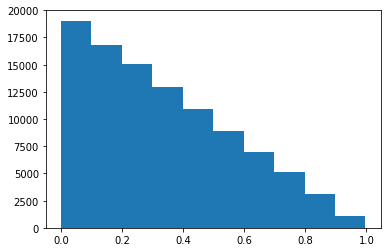

0.33337637441555956

In [9]:
es = np.random.rand(100000, 2)
e = np.min(es, axis=1)
plt.hist(e)
plt.show()
np.mean(e)

$$P(e_1 < e_2) = 0.5$$

$$ E[e_1|e_1 < x] = \frac x2 $$

$$ E[e] = P(e_1 < e_2) E[e_1|e_1<e_2] + P(e_2 < e_1) E[e_2|e_2<e_1] = 2 P(e_1 < e_2) E[e_1|e_1<e_2] $$

$$ E[e] = 2\int_{x=0}^1 P(e_1 < x) E[e_1|e_1 < x]\, dx $$

$$ E[e] = 2\int_0^1 x \cdot \frac x2 \, dx $$

$$ E[e] = \int_0^1 x^2 = \frac13 $$

Which is closest to **Alternative 6D: 0.4**

# Cross Validation

# 7

Leave-one-out cross validation for constant and linear models.

H0: b  
H1: b + ax

on the points

A: (-1 ,0)  
B: ($\rho$, 1)  
C: (1, 0)

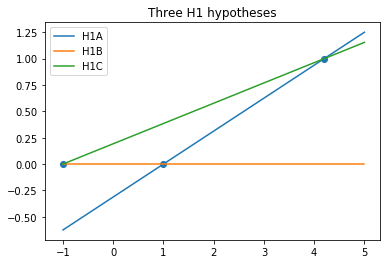

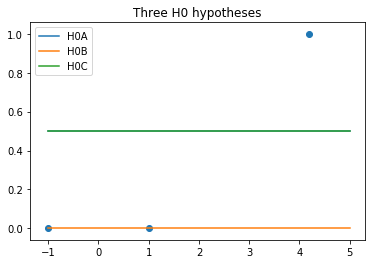

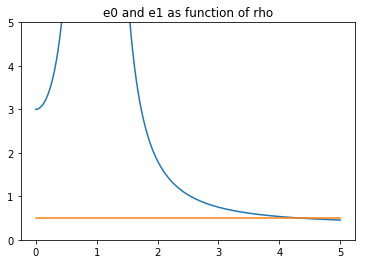

In [19]:
rho = 4.2

xA, yA = -1, 0
xB, yB = rho, 1
xC, yC = 1, 0

def h0A(x):
    return 1/2

def h0B(x):
    return 0

def h0C(x):
    return 1/2

def h1A(x):
    return (1-x)/(1-rho)

def h1B(x):
    return 0

def h1C(x):
    return (x+1)/(1+rho)

plt.title("Three H1 hypotheses")
plt.plot([-1, 5], [h1A(-1), h1A(5)])
plt.plot([-1, 5], [h1B(-1), h1B(5)])
plt.plot([-1, 5], [h1C(-1), h1C(5)])
plt.legend(["H1A", "H1B", "H1C"])
plt.scatter([xA, xB, xC], [yA, yB, yC])
plt.show()

plt.title("Three H0 hypotheses")
plt.plot([-1, 5], [h0A(-5), h0A(5)])
plt.plot([-1, 5], [h0B(-5), h0B(4)])
plt.plot([-1, 5], [h0C(-5), h0C(5)])
plt.legend(["H0A", "H0B", "H0C"])
plt.scatter([xA, xB, xC], [yA, yB, yC])
plt.show()

plt.title("e0 and e1 as function of rho")
rr = np.linspace(0, 5, 1000)
e0 = 1/2
e1 = 1/3 * (1 + 4/(1-rr)**2 + 4/(1+rr)**2)
plt.plot(rr, e1)
plt.plot([0, 5], [e0, e0])
plt.ylim([0, 5])
plt.show()



Solve for exact $\rho$ with SymPy

In [11]:
import sympy as sp
expr = sp.sympify("1/3 * (1 + 4/(1-r)**2 + 4/(1+r)**2) - 1/2")
sp.solve(expr, "r")

[-I*sqrt(-9 + 4*sqrt(6)),
 I*sqrt(-9 + 4*sqrt(6)),
 -sqrt(9 + 4*sqrt(6)),
 sqrt(9 + 4*sqrt(6))]

And we get $\rho = \sqrt{9 + 4\sqrt{6}}$

These are the solutions of the quartic equation $\rho^4 - 18\rho^2 - 15 = 0$. 
The only valid solution (real and positive) is the solution shown above.

In [12]:
sp.solve(sp.sympify("r**4 - 18*r**2 - 15"))

[-I*sqrt(-9 + 4*sqrt(6)),
 I*sqrt(-9 + 4*sqrt(6)),
 -sqrt(9 + 4*sqrt(6)),
 sqrt(9 + 4*sqrt(6))]

Which is **Alternative 7C**

# PLA vs. SVM

## Intermission: Solving quadratic optimization problems with cvxopt

In [13]:
import cvxopt

```
!conda install -c anaconda cvxopt
```

In [14]:
import cvxopt

In [15]:
#help(cvxopt.solvers.qp)

```
Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
```

**Example** (copied from https://optimization.mccormick.northwestern.edu/index.php/Quadratic_programming#Numerical_example).

Minimize $ f(x) = 3x_1^2 + x_2^2 + 2x_1 x_2 + x_1 + 6x_2 + 2 $

such that $2x_1 + 3x_2 \ge 4$ and $x_1\ge 0$ and $x_2 \ge 0$.

---

First rewrite to matrix form.

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T P \mathbf x + \mathbf q^T \mathbf x $

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T
\begin{bmatrix}
1.5 & 1 \\ 1 & 0.5
\end{bmatrix}
\mathbf x +
\begin{bmatrix}
1 & 6 \\
\end{bmatrix}
\mathbf x $

Subject to $G \mathbf x \le h $.

Subject to $\begin{bmatrix}
-2 & -3 \\
-1 & 0 \\
0 & -1 \\
\end{bmatrix}
\mathbf x \le \begin{bmatrix}
4 \\
0 \\
0 \\
\end{bmatrix}$.

In [16]:
%matplotlib inline
from cvxopt.solvers import qp

def f_original(x):
    return 3*x[:,0]**2 + x[:,1]**2 + 2*x[:,0]*x[:,1] + x[:,0] + 6*x[:,1] + 2

def f_matrix(x):
    P = np.array([[1.5, 1],
                  [1, 0.5]])
    q = np.array([[1], [6]])
    return 1/2 * x.T @ P @ x + q.T @ x

def constraints_satisfied(x):
    G = np.array([
        [-2, 3],
        [-1, 0],
        [0, -1],
    ])
    h = np.array([[4], [0], [0]])
    return G @ x <= h

Plot the function and constraints to get an idea.

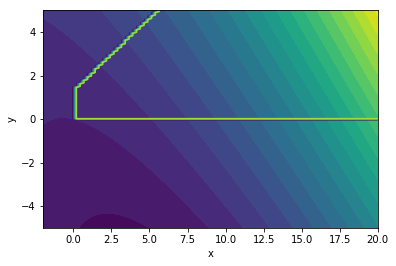

In [17]:
xx, yy = np.linspace(-2, 20, 90), np.linspace(-5, 5, 190)
XX, YY = np.meshgrid(xx, yy)
ZZ_matrix = np.zeros(XX.shape)
ZZ_original = np.zeros(XX.shape)
constraints = np.zeros(XX.shape)

for iy in range(XX.shape[0]):
    for ix in range(XX.shape[1]):
        x = np.array([[XX[iy,ix]], [YY[iy,ix]]])
        ZZ_matrix[iy,ix] = f_matrix(x)
        ZZ_original[iy,ix] = f_matrix(x)
        if np.all(constraints_satisfied(x)):
            constraints[iy,ix] = 1

plt.xlabel("x")
plt.ylabel("y")
plt.contourf(XX, YY, ZZ_matrix, 20)
plt.contour(XX, YY, constraints)

plt.show()

Looks like the minimum within the constraints is around $(0,0)$.

Now back to cvxopt again.
```
qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program

        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
```

In [18]:
P = np.array([[1.5, 1],
              [1.0, 0.5]])

q = np.array([[1.0], 
              [6.0]])

G = np.array([
    [-2.0, 3.0],
    [-1.0, 0.0],
    [0.0, -1.0],
])
    
h = np.array([[4.0], 
              [0.0], 
              [0.0]])

qp(P, q, G, h)

ValueError: use of function valued P, G, A requires a user-provided kktsolver

 > ValueError: use of function valued P, G, A requires a user-provided kktsolver

After some googling, looks like cvxopt does not support NumPy matrices. 
We will have to do the conversion ourselves.

> TypeError: 'q' must be a 'd' matrix with one column

Also the inputs must be doubles, not integers.

In [ ]:
P_cvx = cvxopt.matrix(P)
q_cvx = cvxopt.matrix(q)
G_cvx = cvxopt.matrix(G)
h_cvx = cvxopt.matrix(h)
qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
print(qp_sol)
print(qp_sol["x"])
print(qp_sol["y"])

It works! Now to convert back to NumPy matrix format.

In [ ]:
np.array(qp_sol["x"])

Nice.

# 8

Choose a random linearly separable dataset on [-1, 1], [-1, 1] with N points.

In [201]:
def random_target_function():
    x0, y0 = 2*np.random.rand()-1, 2*np.random.rand()-1
    x1, y1 = 2*np.random.rand()-1, 2*np.random.rand()-1
    return lambda X: np.sign(X[:,2] - (y1 - y0)/(x1 - x0)*(X[:,1] - x0) - y0)

def plot_points(X, y):
    below = np.where(y < 0)
    above = np.where(y > 0)
    plt.scatter(X[below,1], X[below,2])
    plt.scatter(X[above,1], X[above,2])
    plt.legend(["-1", "+1"])

In [203]:
f = random_target_function()
N = 30
X = 2*np.random.rand(N, 3) - 1
X[:,0] = 1
y = f(X)

P = np.eye(3)
P[0,0] = 0

G = -y[:,np.newaxis] * X

h = -np.ones((N, 1))

q = np.zeros((3, 1))

# Solve quadratic programming with cvxopt
P_cvx = cvxopt.matrix(P)
q_cvx = cvxopt.matrix(q)
G_cvx = cvxopt.matrix(G)
h_cvx = cvxopt.matrix(h)
qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
print(qp_sol)
w = np.array(qp_sol["x"])
print(w)

def g(X):
    return np.sign(w.dot(X))



     pcost       dcost       gap    pres   dres
 0:  8.7584e-01  2.0994e+01  9e+01  2e+00  2e+01
 1:  6.8771e+00  1.5485e+01  4e+01  1e+00  9e+00
 2:  1.1151e+01  4.6861e+01  4e+01  9e-01  9e+00
 3:  2.9516e+01  1.3174e+02  6e+01  8e-01  7e+00
 4:  1.0620e+02  1.6938e+02  8e+01  4e-01  4e+00
 5:  1.9789e+02  2.0315e+02  1e+01  5e-02  5e-01
 6:  2.0803e+02  2.0809e+02  2e-01  5e-04  5e-03
 7:  2.0814e+02  2.0815e+02  2e-03  5e-06  5e-05
 8:  2.0815e+02  2.0815e+02  2e-05  5e-08  5e-07
 9:  2.0815e+02  2.0815e+02  2e-07  5e-10  5e-09
Optimal solution found.
{'gap': 1.684878776014615e-07, 'dual infeasibility': 5.223425910612271e-09, 'iterations': 9, 'relative gap': 8.094706590330441e-10, 'x': <3x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 'primal objective': 208.1457501584257, 's': <30x1 matrix, tc='d'>, 'z': <30x1 matrix, tc='d'>, 'dual slack': 1.340694868682321e-12, 'dual objective': 208.1457502149976, 'primal infeasibility': 5.406300495948643e-10, 'status': 'optimal', 'primal slack':

w [[  2.75785834]
 [-10.40985019]
 [ 17.54783518]]
distance to closest: [0.04901186]


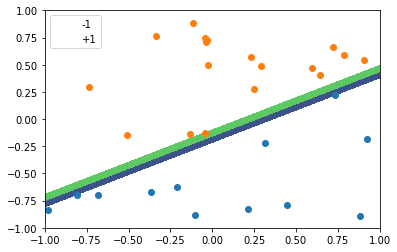

In [207]:
print("w", w)
print("distance to closest:", 1/np.sqrt(w[1]*w[1] + w[2]*w[2]))

Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = Xplot @ w
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

We have an algorithm for SVM using quadratic programming.
Now we need to separate the same dataset with PLA. This time using sklearn instead of implementing from scratch as in previous exercises.

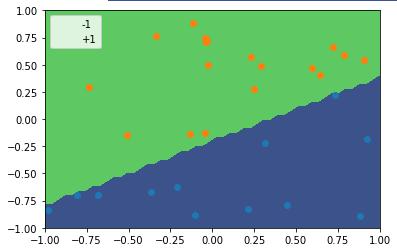

In [214]:
from sklearn.linear_model import Perceptron
pla = Perceptron(fit_intercept=False, max_iter=99999)
pla.fit(X, y)

Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = pla.predict(Xplot)
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

In [262]:
class SVM:
    def fit(self, X, y):
        P = np.eye(3)
        P[0,0] = 0
        G = -y[:,np.newaxis] * X
        h = -np.ones((N, 1))
        q = np.zeros((3, 1))

        P_cvx = cvxopt.matrix(P)
        q_cvx = cvxopt.matrix(q)
        G_cvx = cvxopt.matrix(G)
        h_cvx = cvxopt.matrix(h)
        cvxopt.solvers.options['show_progress'] = False
        qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
        cvxopt.solvers.options['show_progress'] = True
        w = np.array(qp_sol["x"])
        self.w = w
    
    def predict(self, X):
        return np.sign(X @ self.w).flatten()

All algorithms and tools ready, now to finally do the exercise.

For N=10, repeat the following experiment 1000 times: Create a random dataset, fit it with SVM and PLA. Estimate the out of sample error for g_PLA and g_SVM. What percentage of time is g_SVM a better estimator than g_PLA?

SVM percent wins:  1.0
SVM percent wins:  0.5494505494505495
SVM percent wins:  0.5524861878453039
SVM percent wins:  0.5955882352941176
SVM percent wins:  0.590027700831025
SVM percent wins:  0.6017699115044248
SVM percent wins:  0.5981481481481481
SVM percent wins:  0.5904628330995793
SVM percent wins:  0.59375


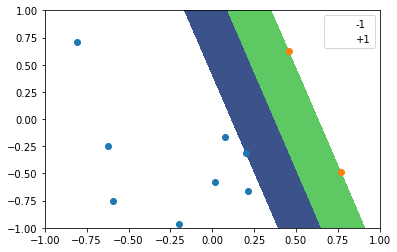

In [271]:
N = 10

pla = Perceptron(fit_intercept=False, max_iter=900)
svm = SVM()

pla_wins = 0
svm_wins = 0
total = 0

for i in range(1000):
    # Create training dataset
    f = random_target_function()
    X = 2*np.random.rand(N, 3) - 1
    X[:,0] = 1
    y = f(X)
    if np.all(y == y[0]):
        continue
    
    # Create testing dataset
    X_test = 2*np.random.rand(1000, 3) - 1
    X_test[:,0] = 1
    y_test = f(X_test)

    
    # Solve with PLA
    pla.fit(X, y)
    e_pla = np.sum(pla.predict(X_test) != y_test)
    
    # Solve with SVM
    svm.fit(X, y)
    e_svm = np.sum(svm.predict(X_test) != y_test)
    
    if e_svm > e_pla:
        pla_wins += 1
        total += 1
    if e_pla > e_svm:
        svm_wins += 1
        total += 1
        
    if i % 100 == 0 and total > 0:
        print ("SVM percent wins: ", svm_wins/total)

    
Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = Xplot @ svm.w
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

SVM wins 60% of the time. **Alternative 8C: 60%**

SVM percent wins:  1.0
mean vecs: 3.0
SVM percent wins:  0.6021505376344086
mean vecs: 3.0
SVM percent wins:  0.5967741935483871
mean vecs: 2.9950248756218905
SVM percent wins:  0.6327272727272727
mean vecs: 2.9966777408637872
SVM percent wins:  0.6521739130434783
mean vecs: 2.997506234413965
SVM percent wins:  0.6507592190889371
mean vecs: 2.9980039920159682
SVM percent wins:  0.6401446654611211
mean vecs: 3.0
SVM percent wins:  0.6506955177743431
mean vecs: 2.9985734664764623
SVM percent wins:  0.6518218623481782
mean vecs: 3.0
SVM percent wins:  0.645083932853717
mean vecs: 3.0011098779134295


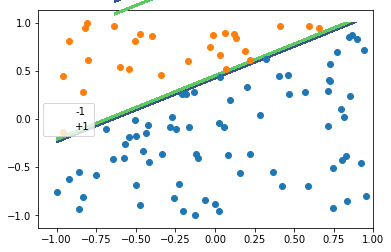

In [275]:
N = 100

pla = Perceptron(fit_intercept=False, max_iter=900)
svm = SVM()

pla_wins = 0
svm_wins = 0
total = 0

num_support_vectors = []

for i in range(1000):
    # Create training dataset
    f = random_target_function()
    X = 2*np.random.rand(N, 3) - 1
    X[:,0] = 1
    y = f(X)
    if np.all(y == y[0]):
        continue
    
    # Create testing dataset
    X_test = 2*np.random.rand(1000, 3) - 1
    X_test[:,0] = 1
    y_test = f(X_test)

    
    # Solve with PLA
    pla.fit(X, y)
    e_pla = np.sum(pla.predict(X_test) != y_test)
    
    # Solve with SVM
    svm.fit(X, y)
    nvecs = np.sum(np.abs(X @ svm.w).flatten() <= 1.001)
    num_support_vectors.append(nvecs)
    e_svm = np.sum(svm.predict(X_test) != y_test)
    
    if e_svm > e_pla:
        pla_wins += 1
        total += 1
    if e_pla > e_svm:
        svm_wins += 1
        total += 1
        
    if i % 100 == 0 and total > 0:
        print ("SVM percent wins: ", svm_wins/total)
        print("mean vecs:", np.mean(num_support_vectors))

    
Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = Xplot @ svm.w
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

# 9

For N=100 SVM is better in around 65-70% of the cases. **Alternative 9D**

# 10

Intuitively, the number of support vectors should always be 3 for real random numbers in 2D, given infinite numerical precision.

In practice we also get 3 support vectors for almost every iteration.

**Alternative 10B: 3**